<a href="https://colab.research.google.com/github/KrishnadasNair-dev/Machine-Learning-Practice/blob/main/District_Pricing_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Taking a quick look at the Data Structure

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


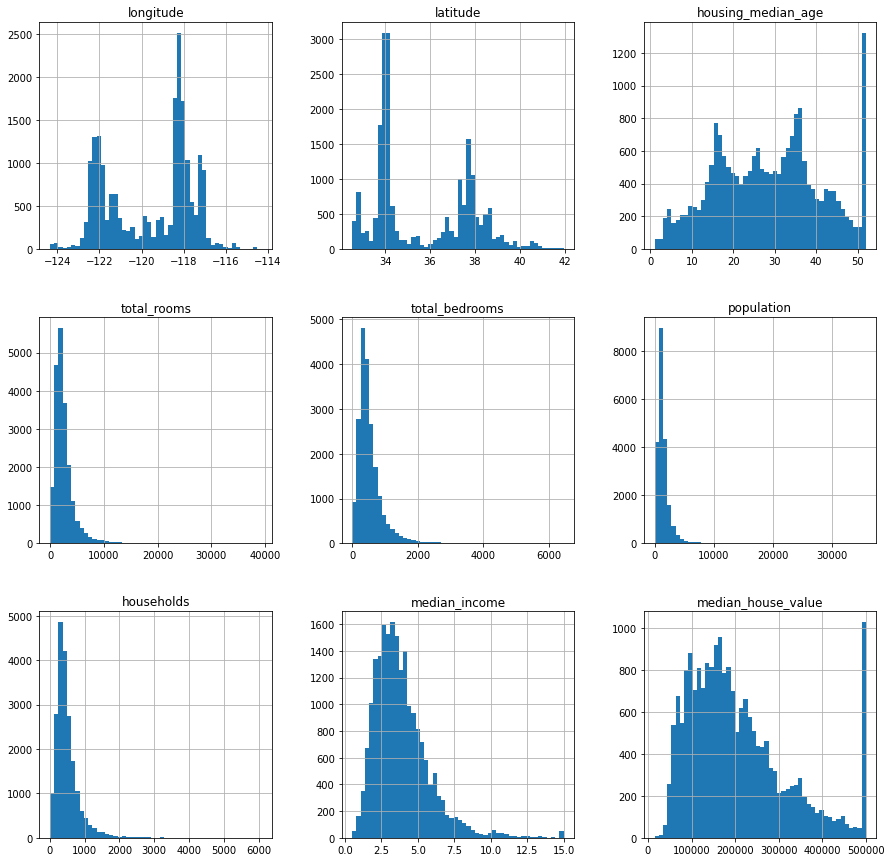

In [ ]:
housing.hist(bins=50,figsize=(15,15))
plt.show()

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)
train_set, test_set

(       longitude  latitude  ...  median_house_value  ocean_proximity
 14196    -117.03     32.71  ...            103000.0       NEAR OCEAN
 8267     -118.16     33.77  ...            382100.0       NEAR OCEAN
 17445    -120.48     34.66  ...            172600.0       NEAR OCEAN
 14265    -117.11     32.69  ...             93400.0       NEAR OCEAN
 2271     -119.80     36.78  ...             96500.0           INLAND
 ...          ...       ...  ...                 ...              ...
 11284    -117.96     33.78  ...            229200.0        <1H OCEAN
 11964    -117.43     34.02  ...             97800.0           INLAND
 5390     -118.38     34.03  ...            222100.0        <1H OCEAN
 860      -121.96     37.58  ...            283500.0        <1H OCEAN
 15795    -122.42     37.77  ...            325000.0         NEAR BAY
 
 [16512 rows x 10 columns],
        longitude  latitude  ...  median_house_value  ocean_proximity
 20046    -119.01     36.06  ...             47700.0        

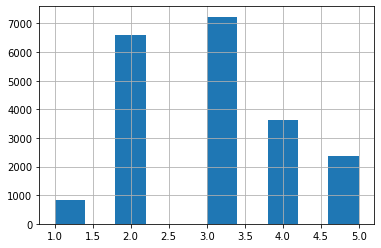

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0,1.5,3.0,4.5,6.0,np.inf],
                               labels=[1,2,3,4,5])

housing["income_cat"].hist()

# Create Test Set

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
         strat_train_set = housing.loc[train_index]
         strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [ ]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [ ]:
for set in (strat_train_set, strat_test_set):
    set.drop("income_cat",axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights 

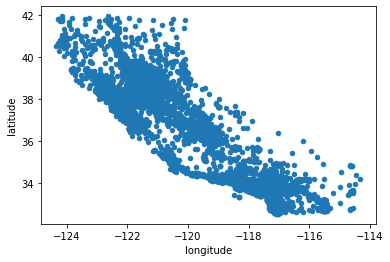

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

A better Visualization can be obtained to highlight the high-density areas

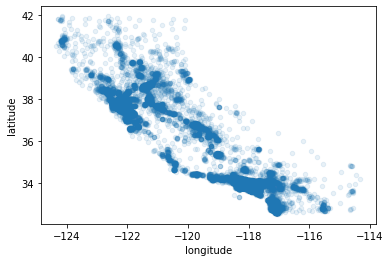

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

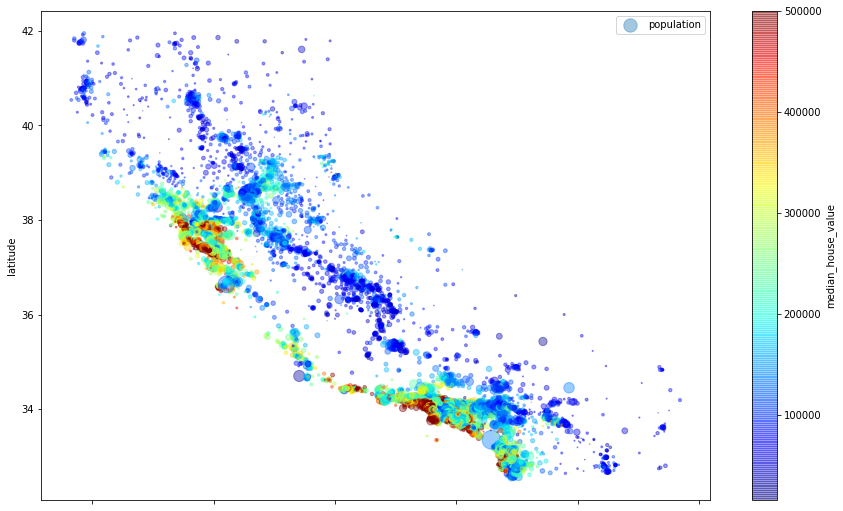

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(15,9),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()